In [1]:
from EXP2_clean_balance import clean_and_balance_csv_files  # Import the function
combined_deleted_df, balanced_dataframes, metrics_table, all_balanced_metrics = clean_and_balance_csv_files()
### PURPOSE: Save final balanced dataframe into finalEXP1.csv ###


📂 Processing: EXP2results55images.csv
Rows before cleaning:
  📥 Total rows: 1650
  Task pie: 825 rows, 55 unique images
  Task bar: 825 rows, 55 unique images
 Total tasks: 1650
Total tasks: 1650

Original Dataset Sizes:
Bar chart rows: 680
Pie chart rows: 678

Balanced Dataset Sizes:
Bar chart rows: 677
Pie chart rows: 677
Deleted rows: 292

📂 Processing: EXP2results55images.csv
Rows before cleaning:
  📥 Total rows: 1650
  Task pie: 825 rows, 55 unique images
  Task bar: 825 rows, 55 unique images
 Total tasks: 1650
Total tasks: 1650

Original Dataset Sizes:
Bar chart rows: 701
Pie chart rows: 678

Balanced Dataset Sizes:
Bar chart rows: 677
Pie chart rows: 677
Deleted rows: 271

📂 Processing: EXP2results55images.csv
Rows before cleaning:
  📥 Total rows: 1650
  Task pie: 825 rows, 55 unique images
  Task bar: 825 rows, 55 unique images
 Total tasks: 1650
Total tasks: 1650

Original Dataset Sizes:
Bar chart rows: 688
Pie chart rows: 677

Balanced Dataset Sizes:
Bar chart rows: 677
Pie

#### Step 1: Caculate average MLAE

In [2]:
import pandas as pd
from EXP2_mlae_analysis import calculate_average_mlae, plot_results

# Load dataset
EXP2 = pd.read_csv("finalEXP2.csv")
print("total number rows:", len(EXP2))

# Run function and get metrics
average_mlae = calculate_average_mlae(EXP2)

average_mlae.info()

# Display results
len(average_mlae)

total number rows: 4062
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Dataset                    10 non-null     object 
 1   Model                      10 non-null     object 
 2   Average MLAE               10 non-null     float64
 3   Average MAE                10 non-null     float64
 4   Std MLAE                   10 non-null     float64
 5   Confidence Interval (95%)  10 non-null     float64
dtypes: float64(4), object(2)
memory usage: 608.0+ bytes


10

In [3]:
average_mlae

,Dataset,Model,Average MLAE,Average MAE,Std MLAE,Confidence Interval (95%)
0,bar,CustomLLaMA,-1.61,0.21,0.38,0.74
1,bar,Gemini1_5Flash,-1.69,0.24,0.44,0.86
2,bar,GeminiProVision,-1.65,0.20,0.30,0.60
3,bar,LLaMA,-1.43,0.38,0.67,1.32
4,bar,gpt4o,-1.50,0.38,0.60,1.18
5,pie,CustomLLaMA,-1.41,0.26,0.25,0.49
6,pie,Gemini1_5Flash,-1.56,0.22,0.31,0.60
7,pie,GeminiProVision,-1.61,0.21,0.33,0.64
8,pie,LLaMA,-1.48,0.39,0.64,1.26
9,pie,gpt4o,-1.15,1.35,1.37,2.69


#### Step 2: Plot average MLAE

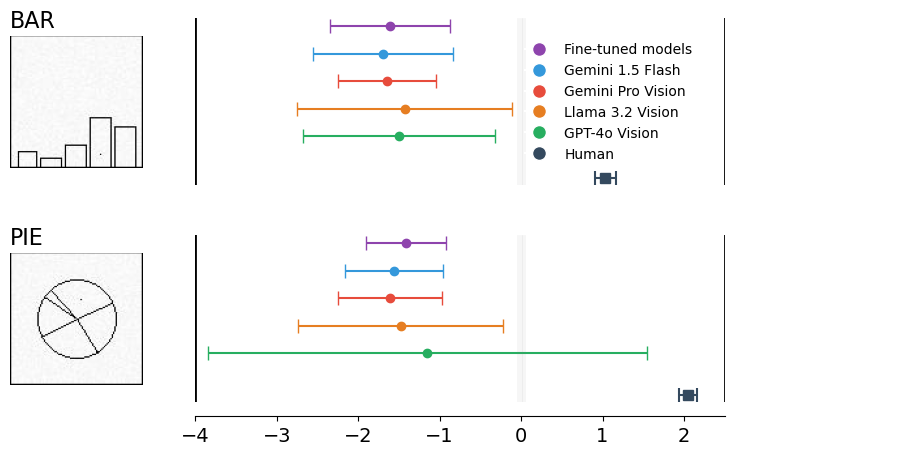

In [4]:
plot_results(average_mlae)

#### Step 3: Perform Statiscal Testing 

- Each error

In [5]:
import sys

sys.path.append('/home/huuthanhvy.nguyen001/tmp/LLMP/ALLSummary/NewSummary/')

from statiscaltesting import perform_statistical_testing, calculate_mlae_individual_EXP2

df = calculate_mlae_individual_EXP2()

perform_statistical_testing(df)


🔬 O'Brien Test for Homogeneity of Variances:
F-statistic: 10.1106
P-value: 3.8385e-08
⚠️ Variances are not equal (heteroscedasticity detected). Using Welch’s ANOVA.

📊 Welch's ANOVA Results:
       Source  ddof1        ddof2          F         p-unc       np2
0  model_name      4  1439.593473  29.873637  6.643195e-24  0.024343
⚠️ Significant result: p-value = 6.6432e-24 (p < 0.01)

🔬 Performing Tukey's HSD Post-hoc Test...

📊 Tukey's HSD Post-hoc Test Results:
         Multiple Comparison of Means - Tukey HSD, FWER=0.01          
     group1          group2     meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------
    CustomLLaMA  Gemini1_5Flash  -0.1099    0.0  -0.185 -0.0347   True
    CustomLLaMA GeminiProVision   -0.124    0.0  -0.196  -0.052   True
    CustomLLaMA           LLaMA   0.0471 0.2102 -0.0252  0.1195  False
    CustomLLaMA           gpt4o   0.0781 0.0962 -0.0246  0.1809  False
 Gemini1_5Flash GeminiProVision  -0.0

#### Step 4: Display unique answers

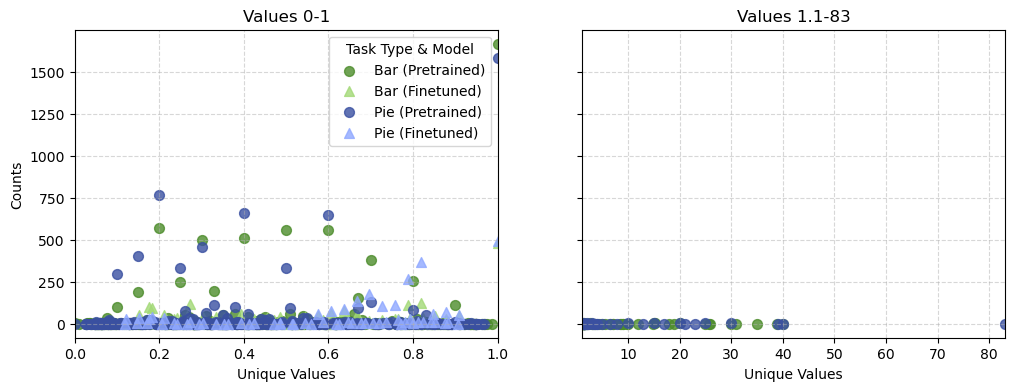

{('bar',
  'Pretrained'): cleaned_answers
 0.00000        5
 0.01000        1
 0.02560        1
 0.03000        3
 0.03400        4
 0.03660        8
 0.03950        1
 0.04170        1
 0.04800        1
 0.04870        7
 0.04878        1
 0.04880        1
 0.05000        5
 0.05260        2
 0.05360        1
 0.05400        1
 0.05560        1
 0.05770        2
 0.05800        3
 0.06000        5
 0.06090        1
 0.06098        1
 0.06100        7
 0.06250        1
 0.06300        2
 0.06380        1
 0.06400        1
 0.06500        3
 0.06980        1
 0.07000        1
 0.07140        4
 0.07310        1
 0.07317        1
 0.07320        7
 0.07500        6
 0.07690       34
 0.07890        1
 0.07900        1
 0.08000       20
 0.08100       14
 0.08110        3
 0.08300        1
 0.08330        2
 0.08500        2
 0.08570        3
 0.08720        1
 0.08800        4
 0.08820        4
 0.09210        1
 0.09375        8
 0.09600        1
 0.09700        2
 0.09756        1
 0.1

In [6]:
from EXP2_clean_balance import visualize_cleaned_answers_overlay

import pandas as pd

visualize_cleaned_answers_overlay(balanced_dataframes)